In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [82]:
df = pd.read_csv('Sample_stocks.csv')
df

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0
...,...,...
643,4,4.0
644,13,4.0
645,1,4.0
646,22,4.0


# Data Analysis

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   returns        648 non-null    int64  
 1   dividendyield  648 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


<AxesSubplot:>

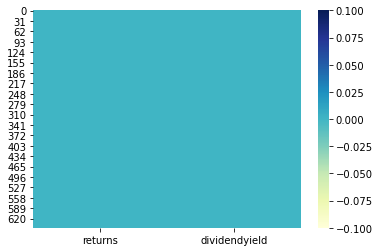

In [84]:
sns.heatmap(df.isnull(),cmap='YlGnBu')

In [85]:
df.describe()

,returns,dividendyield
count,648.000000,648.000000
mean,10.354938,2.434568
std,19.552899,1.645191
min,-20.000000,0.000000
25%,-10.000000,0.700000
50%,10.500000,2.500000
75%,31.000000,4.100000
max,40.000000,4.900000


In [86]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-1.5024685 , -1.48095143],
       [-1.19537158, -1.48095143],
       [-1.2465544 , -1.48095143],
       ...,
       [-0.47881211,  0.95225478],
       [ 0.59602709,  0.95225478],
       [-1.34892004,  0.95225478]])

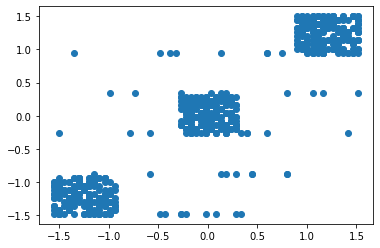

In [87]:
plt.scatter(df[:,0],df[:,[1]])

# Training

In [88]:
kmeans = KMeans(3)
kmeans.fit(df)
labels = kmeans.labels_
print('dissimilaridade para 3:',kmeans.inertia_,'\npredicted array:\n', labels)

dissimilaridade para 3: 77.62109287678894 
predicted array:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

# Results

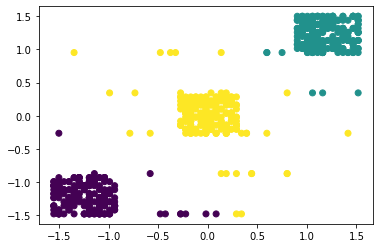

In [89]:
#Without center
plt.scatter(df[:,0], df[:,1], c=labels)

[[-1.21324883 -1.20474178]
 [ 1.20067006  1.21012806]
 [ 0.01143028 -0.00489449]]


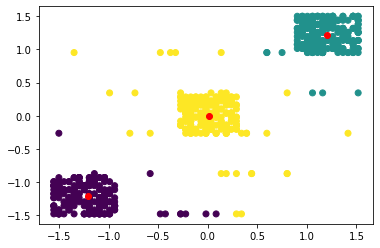

In [90]:
#with center
plt.scatter(df[:,0], df[:,1], c=labels)
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red');

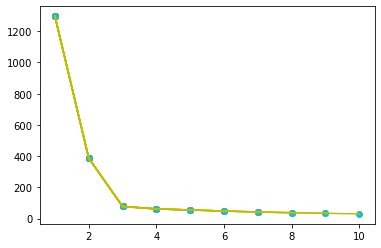

In [91]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

    plt.plot(range(1,len(inertia)+1),inertia,'y')
    plt.scatter(range(1,len(inertia)+1),inertia)

Ficou meio ruim de visualizar pela quantidade de dados

In [92]:
model = AgglomerativeClustering()
model = model.fit(df)
model.children_

array([[   0,    4],
       [   1,   10],
       [   2,   11],
       ...,
       [1284, 1291],
       [1289, 1292],
       [1290, 1293]], dtype=int64)

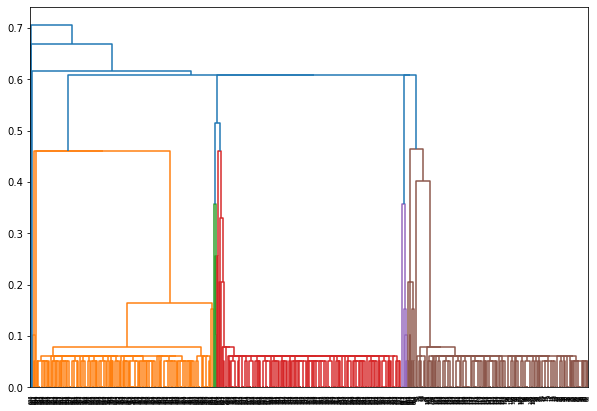

In [100]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(df, method='single'))

# QUESTAO EXTRA

#### DBSCAN basicamente ele começa de um ponto que contem alta densidade e determina um raio onde ele checa se um valor esta dentro ou nao desse raio, caso esteja ele determina que ooutro valor faz parte daquele cluster, onde a range do raio é eps na função

OBSERVAÇAO: estava procurando um algoritmo que tentasse excluir os outliers dos maiores clusters, o DBSCAN faz isso

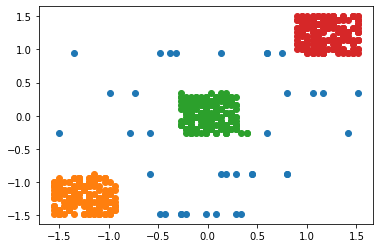

In [97]:
model = DBSCAN(eps=0.15, min_samples=9)

X = df

yhat = model.fit_predict(X)

clusters = unique(yhat)

for cluster in clusters:

    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

plt.show()

Aqui podemos observar a diferença de agrupamento, no caso um contra, pois a depender da range do raio, podem ser declarados varios clusters

OBSERVAÇÃO: as cores dos clusters deve ter repetido pois a paleta de cores da biblioteca acabou

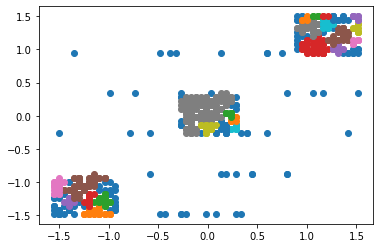

In [98]:
model = DBSCAN(eps=0.07, min_samples=9)

X = df

yhat = model.fit_predict(X)

clusters = unique(yhat)

for cluster in clusters:

    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.show()